# **_Dataset cleaning : Books_**

In [90]:
from IPython.display import Image
from IPython.core.display import HTML 

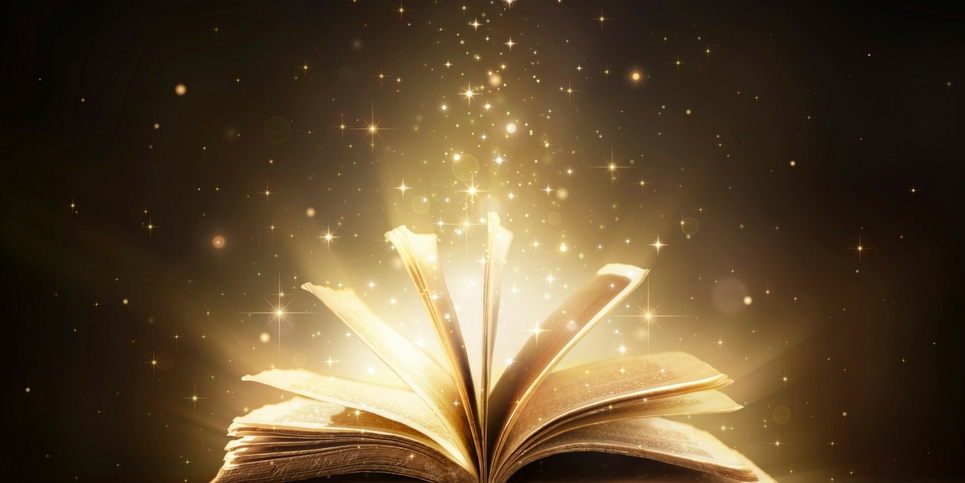

_The aim of this first step is to clean the Dataset before to start working on it._

## . _Import Libraries_

In [63]:
import pandas as pd
import numpy as np
import os, sys
import math
import re
import csv

import warnings
warnings.filterwarnings('ignore')


# Dataset has 271361 rows, jupyter notebook is crashing 
#if I don't limit the number of rows displayed below.
pd.set_option('display.max_columns', 1000) 
pd.set_option('display.max_rows', 1000)
pd.options.display.max_columns = 1000

##  . _Import Data_

In [64]:
books = pd.read_csv('books.csv')
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


##  . _Data Exploring_

Explore and check the dataset, it is necessary to know your dataset before starting cleaning or 
dropping information.

In [65]:
# number of rows and columns
books.shape

(271360, 8)

In [66]:
# types of datas in each columns
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [67]:
books.info

<bound method DataFrame.info of               ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford           

In [68]:
# list of the column's names
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [69]:
# Looking for null datas
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

## . _Data Cleaning_

### _Column title_

Clean the column name by removing the symbols, setting the names in the same format 
(lower case and replace space by _ etc...)

In [70]:
books.columns = [column.lower().replace('-', '_') for column in books.columns]

In [71]:
# Check the column 
list(books.columns)

['isbn',
 'book_title',
 'book_author',
 'year_of_publication',
 'publisher',
 'image_url_s',
 'image_url_m',
 'image_url_l']

In [88]:
books.isna().sum()

isbn                        0
book_title                  0
book_author                 1
year_of_publication         0
publisher                   2
image_url_s                 0
image_url_m                 0
image_url_l                 3
yearOfPublication      271360
dtype: int64

In [89]:
books['book_title'].value_counts()

Selected Poems                                               27
Little Women                                                 24
Wuthering Heights                                            21
Dracula                                                      20
The Secret Garden                                            20
                                                             ..
Paper heroes: A review of appropriate technology              1
Clanton'S Woman (Hitched!) (Harlequin Romance No 3402)        1
Snowjob                                                       1
The Long Way Home (Snelling, Lauraine. Secret Refuge, 3.)     1
Lyon's Pride                                                  1
Name: book_title, Length: 242135, dtype: int64

### _year_of_publication_

As it can be seen from below that there are some incorrect entries in this field. Also some of the entries are strings and same years have been entered as numbers in some places

In [72]:
books['year_of_publication'].value_counts()

2002                 13903
2001                 13715
1999                 13414
2000                 13373
1998                 12116
2003                 11610
1997                 11494
1996                 10687
1995                 10259
1994                  8857
1993                  7920
1992                  7390
1991                  6926
1990                  6394
1989                  5825
1988                  5545
1987                  4761
2004                  4629
1986                  4258
1999                  4017
1985                  3912
2000                  3859
2002                  3724
1998                  3650
2001                  3644
1984                  3631
0                     3570
1997                  3396
1996                  3343
1983                  3297
1995                  3287
1982                  3132
1994                  2939
2003                  2748
1993                  2682
1992                  2516
1991                  2463
1

The column "year_of_publication" should only be filed with years. As we can notice above, it is not the case, there are some data which should be there:
   - DK Publishing Inc
   - Gallimard 

Those two are publisher company and not years. We need to localise were are those data and correct it.

In [73]:
books.year_of_publication.describe()

count     271360
unique       202
top         2002
freq       13903
Name: year_of_publication, dtype: int64

#### _DK Publishing Inc:_

First we need to find where the two "DK Publishing Inc" are.

In [74]:
books.loc[books.year_of_publication == 'DK Publishing Inc',:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Then **Goolgle** :_"Creating the X-Men, How It All Began DK Publishing Inc year of publishing"_ in order to get the year of publication. And apply the modification needed.

In [75]:
books.loc[books.isbn == '0789466953','year_of_publication'] = 2000
books.loc[books.isbn == '0789466953','book_author'] = "James Buckley"
books.loc[books.isbn == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.isbn == '0789466953','book_title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [76]:
books.loc[books.isbn == '078946697X','year_of_publication'] = 2000
books.loc[books.isbn == '078946697X','book_author'] = "Michael Teitelbaum"
books.loc[books.isbn == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.isbn == '078946697X','book_title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

Let's have a look at our corrections.

In [77]:
books.loc[(books.isbn == '0789466953') | (books.isbn == '078946697X'),:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


#### _Gallimard:_

Same process as done previously, we need to localise "Gallimard" and correct it.

In [78]:
books.loc[books.year_of_publication == 'Gallimard',:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


Then **Goolgle** :_"Peuple du ciel, suivi de 'Les Bergers Gallimard year of publishing"_ in order to get the year of publication. And apply the modification needed. I also corrected the book_author as it had some symbole.

In [79]:
books.loc[books.isbn == '2070426769','year_of_publication'] = 2003
books.loc[books.isbn == '2070426769','book_author'] = "Jean-Marie Gustave Le Clezio"
books.loc[books.isbn == '2070426769','publisher'] = "Gallimard"
books.loc[books.isbn == '2070426769','book_title'] = "Peuple du ciel, suivi de 'Les Bergers"

#And chech the correction
books.loc[books.isbn == '2070426769',:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le Clezio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [80]:
books.year_of_publication=pd.to_numeric(books.year_of_publication, errors='coerce')

print(sorted(books['year_of_publication'].unique()))


[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


Now we can see that all values in year_of_publication as are integers. 

However, there are some value which are invalid:
- Value zero 
- Value years after 2006 (this dataset was published in 2004.)

We have assumed that years after 2006 to be invalid keeping some margin in case dataset was updated thereafer. Then setting invalid years as NaN and replacing NaNs with mean value of year_of_publication.

In [83]:
books.year_of_publication.fillna(round(books.year_of_publication.mean()), inplace=True)

In [ ]:
#work on the formulas!!!!

In [85]:
books.loc[(books.year_of_publication > 2006) | (books.year_of_publication == 0),'yearOfPublication'] = np.NAN

In [59]:
books.year_of_publication.isnull().sum()

0

In [60]:
books.year_of_publication = books.year_of_publication.astype(np.int32)

In [86]:
books['year_of_publication'].value_counts()

2002    17627
1999    17431
2001    17359
2000    17234
1998    15766
1997    14890
2003    14359
1996    14030
1995    13546
1994    11796
1993    10602
1992     9906
1991     9389
1990     8660
1989     7936
1988     7492
1987     6529
1986     5841
2004     5839
1985     5343
1984     4986
0        4618
1983     4499
1982     4197
1981     3279
1980     2676
1979     2208
1978     2131
1977     1897
1976     1597
1975     1219
1974     1023
1973      923
1972      772
1971      540
1970      459
1969      339
1968      233
1966      183
1967      176
1965      173
1964      149
1960      133
1963      132
1961      132
1962      123
1959      103
1958       77
1957       76
1956       74
1955       70
1953       63
1954       54
2005       46
1951       40
1940       36
1952       34
1920       33
1950       32
1911       19
1947       14
1942       14
1930       13
1946       13
1949       11
1923       11
1941       10
1948        9
1939        9
1945        8
1943        8
1936  

### _Publisher_

As it can be seen from below that there are some NaN entries in this field. 

In [47]:
books.loc[books.publisher.isnull(),:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,yearOfPublication
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,NaN


In [46]:
#investigating rows having NaNs
#Checking with rows having bookTitle as Tyrant Moon to see if we can get any clues
books.loc[(books.book_title == 'Tyrant Moon'),:]
#no clues

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,yearOfPublication
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,NaN


In [ ]:
#Checking with rows having bookTitle as Finder Keepers to see if we can get any clues
books.loc[(books.book_title == 'Finders Keepers'),:]

In [ ]:
#checking by book_author to find patterns
books.loc[(books.book_author == 'Elaine Corvidae'),:]
#all having different publisher...no clues here

In [ ]:
#checking by book_author to find patterns
books.loc[(books.book_author == 'Linnea Sinclair'),:]

In [ ]:
#since there is nothing in common to infer publisher for NaNs, replacing these with 'other
books.loc[(books.ISBN == '193169656X'),'publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'other'

### _Drop unnecessary column_


Drop column which are not required - The last 3 columns: 
  - Photo 
  - Logos
  - Image URLs

In [48]:
books_final = books.drop(['image_url_s', 'image_url_m', 'image_url_l'],axis=1)

##  . Save data

In [50]:
## Saving the new clean data set under 'books_final' as a new csv file.
books_final.to_csv(r'C:\Users\ASUS\Data Analytics\Projects\Recommended-Reading\books_final.csv')